# Test criterions for Benchmark

In [11]:
# FUNCTIONS / CLASSES :
import sys
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append("./code")
from metrics import METEOR, BLEU, WACC, CHRF, TER, compute_metrics
from criterions import compute_correlation, domain_coverage, bad_quality_detection, Borda_count

metrics = [METEOR, BLEU, WACC, CHRF, TER]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data = pd.read_csv("./data/metrics_scores.csv")

In [13]:
str(metrics[1].__name__)

'BLEU'

In [14]:
compute_correlation(
    data = data,
    metric_1 = str(metrics[1].__name__),
    metric_2 = str(metrics[2].__name__),
    correlation_type = "spearman"
)

0.8949504906624423

In [15]:
data = pd.read_csv("./data/metrics_scores.csv")
data = data[data.sltl == "ende"]

print("Correlation w human score : ")
for metric in metrics:
    metric_name = str(metric.__name__)
    print("METRIC NAME : ", metric_name)
    for domain in data.domain.unique():
        score = domain_coverage(
                    data = data,
                    candidate_metric = metric_name,
                    correlation_type = "spearman",
                    domain = domain
                )
        print(domain.upper(), " => ", score)
    
    print("\n")

Correlation w human score : 
METRIC NAME :  METEOR
CONVERSATION  =>  0.29231939987576444
NEWS  =>  0.14756060587829803
ECOMMERCE  =>  0.14282016444857923
SOCIAL  =>  0.13670934104122962


METRIC NAME :  BLEU
CONVERSATION  =>  0.26905612961816205
NEWS  =>  0.13754037533154614
ECOMMERCE  =>  0.1474267190668435
SOCIAL  =>  0.13686813474759743


METRIC NAME :  WACC
CONVERSATION  =>  0.2571729675695661
NEWS  =>  0.14278751324656416
ECOMMERCE  =>  0.1372842440678774
SOCIAL  =>  0.1302596016046559


METRIC NAME :  CHRF
CONVERSATION  =>  0.32104551324256964
NEWS  =>  0.16162020938432775
ECOMMERCE  =>  0.12404576310627463
SOCIAL  =>  0.14901331381144958


METRIC NAME :  TER
CONVERSATION  =>  0.2601935475209502
NEWS  =>  0.146210884453443
ECOMMERCE  =>  0.14040870314210407
SOCIAL  =>  0.12762008757179272




In [16]:
data = pd.read_csv("./data/metrics_scores.csv")
data = data[data.sltl == "ende"]

print("Correlation w human score : ")
for metric in metrics:
    metric_name = str(metric.__name__)
    print("METRIC NAME : ", metric_name)
    score = bad_quality_detection(
                data = data,
                candidate_metric = metric_name,
                correlation_type = "spearman",
                alpha = 0.1
            )
    print("SCORE => ", score)
    print("\n")

Correlation w human score : 
METRIC NAME :  METEOR
SCORE =>  0.14359840095952806


METRIC NAME :  BLEU
SCORE =>  0.12923019192273663


METRIC NAME :  WACC
SCORE =>  0.14434491350466092


METRIC NAME :  CHRF
SCORE =>  0.1435465015869422


METRIC NAME :  TER
SCORE =>  0.14505717852765349




[[3. 0. 1. 4. 2.]
 [3. 0. 4. 2. 1.]
 [1. 0. 4. 2. 3.]
 [3. 1. 0. 2. 4.]
 [4. 2. 0. 3. 1.]
 [3. 0. 1. 4. 2.]]
BORDA COUNT RANKS : 
METEOR  :  1
BLEU  :  2
WACC  :  4
CHRF  :  0


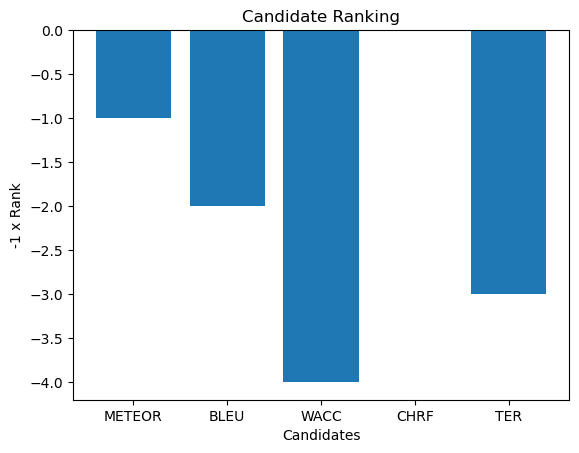

In [27]:
borda_count_ranks = Borda_count(
                        data = data,
                        metrics = metrics,
                        correlation_type = "spearman"
                    )
print("BORDA COUNT RANKS : ")
for n in range(N):
    print(str(metrics[n].__name__) , " : ", borda_count_ranks[n])

plt.bar([str(metric.__name__) for metric in metrics], -1*borda_count_ranks)
plt.xlabel('Candidates')
plt.ylabel('-1 x Rank')
plt.title('Candidate Ranking')
plt.show()

BORDA COUNT RANKS : 
METEOR  :  0
BLEU  :  1
NIST  :  2
WACC  :  3


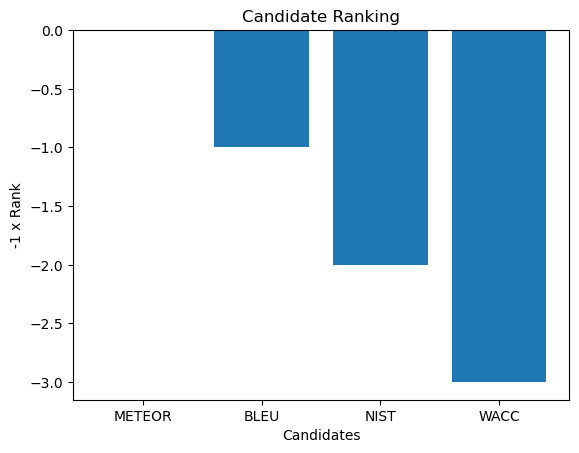

In [8]:
data = pd.read_csv("./data/metrics_scores.csv")
L = len(data.domain.unique())
N = len(metrics)
ranks = np.empty((L, N))

for l in range(L):
    criterion_scores = []
    criterion_domain = data.domain.unique()[l]
    for n in range(N):
        candidate_metric = str(metrics[n].__name__)
        score = domain_coverage(
                    data = data,
                    candidate_metric = candidate_metric,
                    correlation_type = "spearman",
                    domain = criterion_domain
                )
        criterion_scores.append(-1*score)
    
    ranks[l,:] = np.argsort(criterion_scores)

borda_count_ranks = Borda_count(ranks)
